<a href="https://colab.research.google.com/github/Saileshmurali/Machine-Learning/blob/main/Handwritten-Digit-CNN/Digit_1_CNN_With_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import itertools
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical #one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


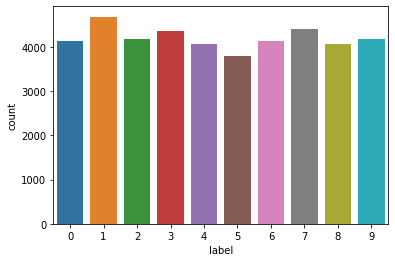

In [ ]:
train = pd.read_csv("train.csv")
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
sns.countplot(Y_train)

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=123)

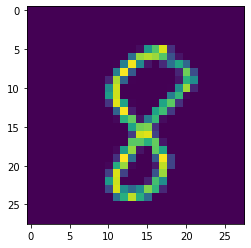

In [ ]:
plt.imshow(X_train[111][:,:,0])

In [ ]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
#model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        fill_mode='nearest'
)
validgen=ImageDataGenerator(
    rescale=1.0/255
)

In [ ]:
epochs = 10
batch_size = 86

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, 
                              validation_data=validgen.flow(X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
390/390 - 246s - loss: 1.1370 - accuracy: 0.6098 - val_loss: 0.1935 - val_accuracy: 0.9485
Epoch 2/10
390/390 - 243s - loss: 0.4416 - accuracy: 0.8664 - val_loss: 0.0840 - val_accuracy: 0.9737
Epoch 3/10
390/390 - 243s - loss: 0.3235 - accuracy: 0.9010 - val_loss: 0.0658 - val_accuracy: 0.9800
Epoch 4/10
390/390 - 242s - loss: 0.2764 - accuracy: 0.9164 - val_loss: 0.0532 - val_accuracy: 0.9842
Epoch 5/10
390/390 - 242s - loss: 0.2441 - accuracy: 0.9241 - val_loss: 0.0407 - val_accuracy: 0.9879
Epoch 6/10
390/390 - 242s - loss: 0.2303 - accuracy: 0.9306 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 7/10
390/390 - 243s - loss: 0.2094 - accuracy: 0.9368 - val_loss: 0.0331 - val_accuracy: 0.9895
Epoch 8/10
390/390 - 245s - loss: 0.1936 - accuracy: 0.9415 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 9/10
390/390 - 242s - loss: 0.1774 - accuracy: 0.9460 - val_loss: 0.0272 - val_accuracy: 0.9921
Epoch 10/10
390/390 - 243s - loss: 0.1720 - accuracy: 0.9483 - val_loss: 0.0363 - 

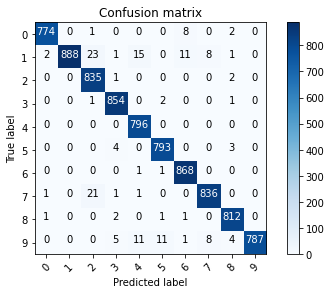

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx =confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
print(classification_report(Y_pred_classes,Y_true))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       778
           1       0.94      1.00      0.97       888
           2       1.00      0.95      0.97       881
           3       1.00      0.98      0.99       868
           4       1.00      0.97      0.98       824
           5       0.99      0.98      0.99       808
           6       1.00      0.98      0.99       889
           7       0.97      0.98      0.98       852
           8       0.99      0.98      0.99       825
           9       0.95      1.00      0.98       787

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



Text(0.5, 1.0, 'Training and validation loss')

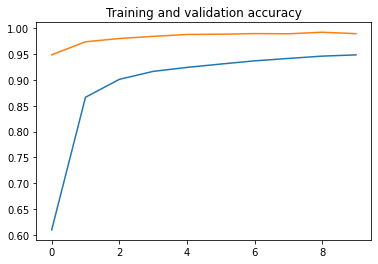

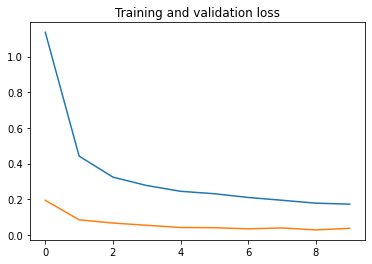

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)         